In [56]:
#boston housing dataset
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

In [81]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
print(boston_dataset.keys())


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [93]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [95]:
boston['MEDV'] = boston_dataset.target

In [99]:
#data processing by counting the number of missing values for each feature using isnull()
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

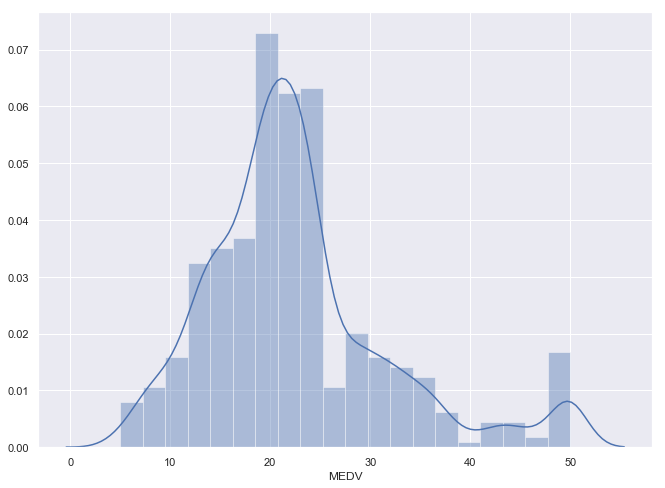

In [109]:
#exploring the data using seaborn by first exploring the target variable 'MEDV'
sns.set(rc={'figure.figsize':(11,8)})
sns.distplot(boston['MEDV'], bins=20)
plt.show()

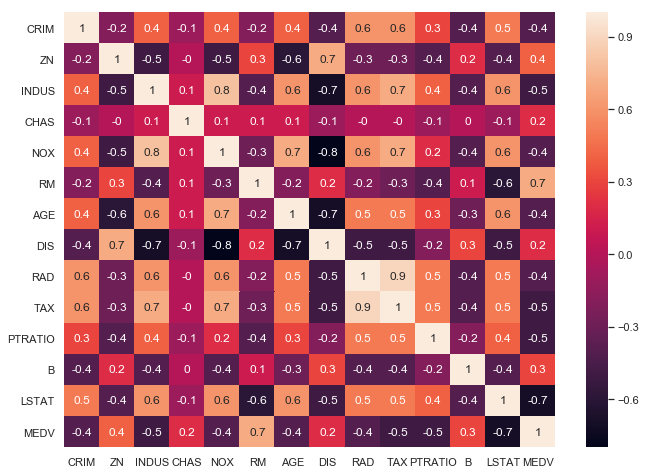

In [114]:
#making a heatmap for the correlation matrix that measures the linear relationships between the variables
correlation_matrix = boston.corr().round(1)
#annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

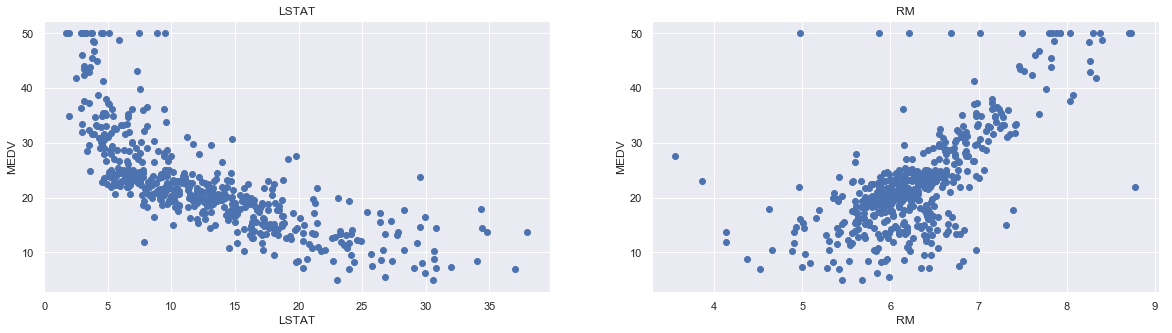

In [118]:
#A scatter plot let’s see how RM and LSTAT the chosen features vary with MEDV
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [144]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

In [153]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(404, 2)
(102, 2)
(404,)
(102,)


In [156]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [168]:
#model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))

The model performance for testing set
--------------------------------------
RMSE is 5.6371293350711955


In [165]:
#model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))

The model performance for testing set
--------------------------------------
RMSE is 5.13740078470291
